In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Sensitivity of cchem parameterspace to temperature, salinity, DIC, TA, nut. 
 
    PLOT omega, pH for : 
        TA=DIC=2000 at T = 5-25, S = 0 - 35
        


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [4]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([400,400])
T = np.zeros([400,400])
TA = np.zeros([400,400])
DIC = np.zeros([400,400])

S[:] = 30
T[:] = 10

for i in range(0,400):
    DIC[i,:] = 1800 + 1*i
for i in range(0,400):
    TA[:,i] = 1800 + 1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(400,400)
OmegaAr_vTD = OmegaA.reshape(400,400)

In [5]:
#salinity 0-35
#
S = np.zeros([200,350])
T = np.zeros([200,350])
TA = np.zeros([200,350])
DIC = np.zeros([200,350])

DIC[:] = 2000 * 1e-6
TA[:] = 2000 * 1e-6

for i in range(0,200):
    T[i,:] = 0.1*i
for i in range(0,350):
    S[:,i] = 0.1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC)
TAr = np.ravel(TA)

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vST = pH.reshape(200,350)
OmegaAr_vST = OmegaA.reshape(200,350)

In [6]:
#salinity 0-35
#
S = np.zeros([500,500])
T = np.zeros([500,500])
TA = np.zeros([500,500])
DIC = np.zeros([500,500])
phos = np.zeros([500,500])
sil = np.zeros([500,500])

DIC[:] = 2000 * 1e-6
TA[:] = 2000 * 1e-6
S[:] = 30
T[:] = 10

for i in range(0,500):
    phos[i,:] = 0.004 *i
for i in range(0,500):
    sil[:,i] = 0.1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC)
TAr = np.ravel(TA)
phosr = np.ravel(phos) * 1e-6
silr = np.ravel(sil) * 1e-6
zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=silr, phos=phosr, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vSP = pH.reshape(500,500)
OmegaAr_vSP = OmegaA.reshape(500,500)

In [7]:
# x = [0,1,2]
# y = [0,1,2]
# fa = 1.7
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(8 * fa, 13 *fa), sharey=False)
# #fig.tight_layout()

# t_cmap = cm.cm.thermal
# #tplt = OmegaAr_vDT

# clabel = 'OmegaA'


# ####AX1######
# #pH at DIC and TA from 1800-2200
# v_min = 6.5
# v_max = 8.6
# t_cmap = cm.cm.haline

# tplt = pHr_vTD
# mesh = ax1.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax1.set_title('pH v DIC TA',fontsize = 14 )
# cbar = fig.colorbar(mesh, ax=ax1)
# cbar.set_label('pH', fontsize = 14 )
# ax1.set_xlabel('TA', fontsize = 14 )
# ax1.set_ylabel('DIC', fontsize = 14 )
# major_xTD = np.arange(0, 401, 50)
# x_labTD = (['1800','1850','1900','1950','2000','2050','2100','2150','2200'])
# ax1.set_xticks(major_xTD)
# ax1.set_yticks(major_xTD)
# ax1.set_xticklabels(x_labTD)
# ax1.set_yticklabels(x_labTD)

# ####AX2######
# #OmA at DIC and TA from 1800-2200
# v_min = 0
# v_max = 2
# t_cmap = cm.cm.thermal
# tplt = OmegaAr_vTD
# mesh = ax2.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax2.set_title('Omega A v DIC TA',fontsize = 14 )
# cbar = fig.colorbar(mesh, ax=ax2)
# cbar.set_label('Omega A', fontsize = 14 )
# ax2.set_xlabel('TA', fontsize = 14 )
# ax2.set_ylabel('DIC', fontsize = 14 )
# ax2.set_xticks(major_xTD)
# ax2.set_yticks(major_xTD)
# ax2.set_xticklabels(x_labTD)
# ax2.set_yticklabels(x_labTD)

# ####ax3######
# #pH at Salinity, Temp 
# v_min = 7.2
# v_max = 7.8
# t_cmap = cm.cm.haline

# tplt = pHr_vST
# mesh = ax3.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax3.set_title('pH v salinity temp',fontsize = 14 )
# cbar = fig.colorbar(mesh, ax=ax3)
# cbar.set_label('pH', fontsize = 14 )
# ax3.set_xlabel('salinity', fontsize = 14 )
# ax3.set_ylabel('temp', fontsize = 14 )
# major_xST = np.arange(0, 351, 50)
# major_yST = np.arange(0, 201, 50)
# x_labST = (['0','5','10','15','20','25','30','35'])
# y_labST = (['0','5','10','15','20'])
# ax3.set_xticks(major_xST)
# ax3.set_yticks(major_yST)
# ax3.set_xticklabels(x_labST)
# ax3.set_yticklabels(y_labST)

# ####ax4######
# #OmA at Salinity, Temp 
# v_min = 0
# v_max = 0.6
# t_cmap = cm.cm.thermal

# tplt = OmegaAr_vST
# mesh = ax4.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax4.set_title('Omega A v salinity temp',fontsize = 14 )
# cbar = fig.colorbar(mesh, ax=ax4)
# cbar.set_label('OmegaA', fontsize = 14 )
# ax4.set_xlabel('salinity', fontsize = 14 )
# ax4.set_ylabel('temp', fontsize = 14 )
# ax4.set_xticks(major_xST)
# ax4.set_yticks(major_yST)
# ax4.set_xticklabels(x_labST)
# ax4.set_yticklabels(y_labST)

# ####ax5######
# #pH at silicate, phosphate
# v_min = 7.543
# v_max = 7.552
# t_cmap = cm.cm.haline

# tplt = pHr_vSP
# mesh = ax5.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax5.set_title('pH v silicate, phosphate',fontsize = 14 )
# cbar = fig.colorbar(mesh, ax=ax5)
# cbar.set_label('pH', fontsize = 14 )
# ax5.set_xlabel('silicate', fontsize = 14 )
# ax5.set_ylabel('phosphate', fontsize = 14 )
# major_xSP = np.arange(0, 501, 50)
# major_ySP = np.arange(0, 501, 125)
# x_labSP = (['0','5','10','15','20','25','30','35','40','45','50'])
# y_labSP = (['0','0.5','1','1.5','2'])
# ax5.set_xticks(major_xSP)
# ax5.set_yticks(major_ySP)
# ax5.set_xticklabels(x_labSP)
# ax5.set_yticklabels(y_labSP)

# ####ax6######
# #oma at silicate, phosphate
# v_min = 0.558
# v_max = 0.57
# t_cmap = cm.cm.thermal

# tplt = OmegaAr_vSP
# mesh = ax6.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax6.set_title('OmA v silicate, phosphate',fontsize = 14 )
# cbar = fig.colorbar(mesh, ax=ax6)
# cbar.set_label('pH', fontsize = 14 )
# ax6.set_xlabel('silicate', fontsize = 14 )
# ax6.set_ylabel('phosphate', fontsize = 14 )
# major_xSP = np.arange(0, 501, 50)
# major_ySP = np.arange(0, 501, 125)
# ax6.set_xticks(major_xSP)
# ax6.set_yticks(major_ySP)
# ax6.set_xticklabels(x_labSP)
# ax6.set_yticklabels(y_labSP)

In [8]:
## Retreive one dataset 
date = 'Nov 13, 2014'
ptrc = '/results/SalishSea/hindcast/13nov14/SalishSea_1d_20141113_20141113_ptrc_T.nc'
carp = '/results/SalishSea/hindcast/13nov14/SalishSea_1d_20141113_20141113_carp_T.nc'
grid = '/results/SalishSea/hindcast/13nov14/SalishSea_1d_20141113_20141113_grid_T.nc'

wb = nc.Dataset(ptrc)
wc = nc.Dataset(carp)
wp = nc.Dataset(grid)

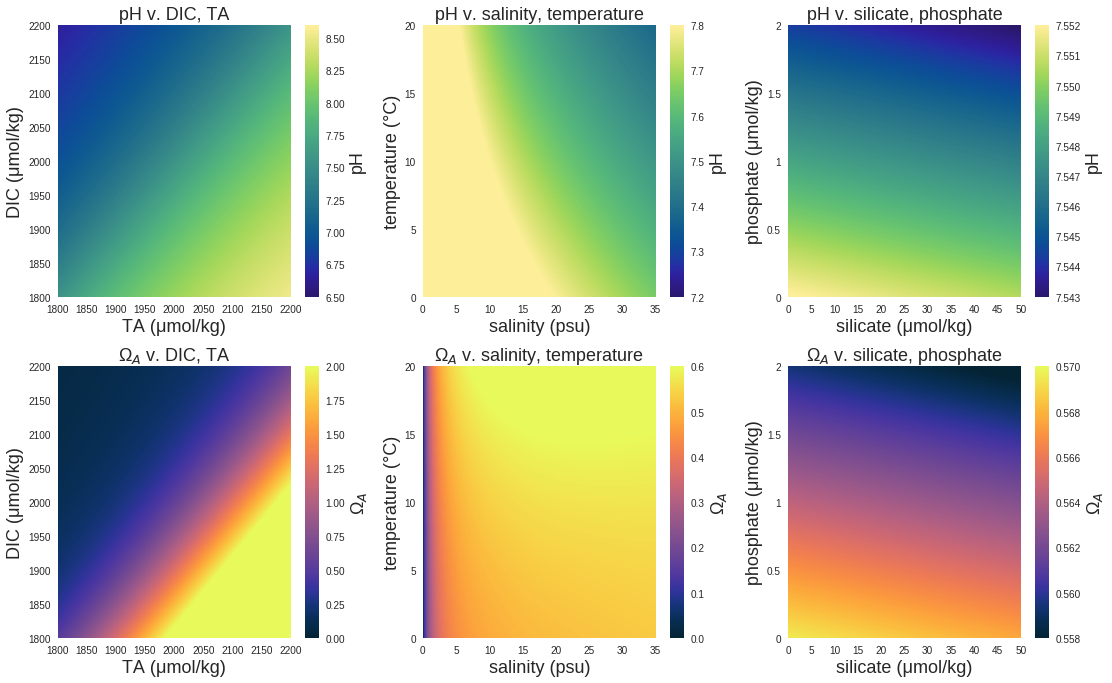

In [9]:
x = [0,1,2]
y = [0,1,2]
fa = 1.2
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
plt.subplots(2, 3, figsize=(13 *fa, 8 * fa), sharey=False)
#fig.tight_layout()

t_cmap = cm.cm.thermal
#tplt = OmegaAr_vDT

clabel = 'OmegaA'


####AX1######
#pH at DIC and TA from 1800-2200
v_min = 6.5
v_max = 8.6
t_cmap = cm.cm.haline

tplt = pHr_vTD
mesh = ax1.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax1.set_title('pH v. DIC, TA',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax1)
cbar.set_label('pH', fontsize = 18 )
ax1.set_xlabel('TA (μmol/kg)', fontsize = 18)
ax1.set_ylabel('DIC (μmol/kg)', fontsize = 18 )
# ax1.set_xticks(fontsize = 14)
# ax1.set_yticks(fontsize = 14)
major_xTD = np.arange(0, 401, 50)
x_labTD = (['1800','1850','1900','1950','2000','2050','2100','2150','2200'])
ax1.set_xticks(major_xTD)
ax1.set_yticks(major_xTD)
ax1.set_xticklabels(x_labTD)
ax1.set_yticklabels(x_labTD)


####ax2######
#pH at Salinity, Temp 
v_min = 7.2
v_max = 7.8
t_cmap = cm.cm.haline

tplt = pHr_vST
mesh = ax2.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax2.set_title('pH v. salinity, temperature',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax2)
cbar.set_label('pH', fontsize = 18 )
ax2.set_xlabel('salinity (psu)', fontsize = 18 )
ax2.set_ylabel('temperature (°C)', fontsize = 18 )
major_xST = np.arange(0, 351, 50)
major_yST = np.arange(0, 201, 50)
x_labST = (['0','5','10','15','20','25','30','35'])
y_labST = (['0','5','10','15','20'])
ax2.set_xticks(major_xST)
ax2.set_yticks(major_yST)
ax2.set_xticklabels(x_labST)
ax2.set_yticklabels(y_labST)


####ax5######
#pH at silicate, phosphate

v_min = 7.543
v_max = 7.552
t_cmap = cm.cm.haline

tplt = pHr_vSP
mesh = ax3.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax3.set_title('pH v. silicate, phosphate',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax3)
cbar.set_label('pH', fontsize = 18 )
ax3.set_xlabel('silicate (μmol/kg)', fontsize = 18 )
ax3.set_ylabel('phosphate (μmol/kg)', fontsize = 18 )
major_xSP = np.arange(0, 501, 50)
major_ySP = np.arange(0, 501, 125)
x_labSP = (['0','5','10','15','20','25','30','35','40','45','50'])
y_labSP = (['0','0.5','1','1.5','2'])
ax3.set_xticks(major_xSP)
ax3.set_yticks(major_ySP)
ax3.set_xticklabels(x_labSP)
ax3.set_yticklabels(y_labSP)

####AX4######
#OmA at DIC and TA from 1800-2200

v_min = 0
v_max = 2
t_cmap = cm.cm.thermal
tplt = OmegaAr_vTD
mesh = ax4.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax4.set_title('Ω$_A$ v. DIC, TA',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax4)
cbar.set_label('Ω$_A$', fontsize = 18 )
ax4.set_xlabel('TA (μmol/kg)', fontsize = 18 )
ax4.set_ylabel('DIC (μmol/kg)', fontsize = 18 )
ax4.set_xticks(major_xTD)
ax4.set_yticks(major_xTD)
ax4.set_xticklabels(x_labTD)
ax4.set_yticklabels(x_labTD)



####ax4######
#OmA at Salinity, Temp 
v_min = 0
v_max = 0.6
t_cmap = cm.cm.thermal

tplt = OmegaAr_vST
mesh = ax5.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax5.set_title('Ω$_A$ v. salinity, temperature',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax5)
cbar.set_label('Ω$_A$', fontsize = 18 )
ax5.set_xlabel('salinity (psu)', fontsize = 18 )
ax5.set_ylabel('temperature (°C)', fontsize = 18 )
ax5.set_xticks(major_xST)
ax5.set_yticks(major_yST)
ax5.set_xticklabels(x_labST)
ax5.set_yticklabels(y_labST)


####ax6######
#oma at silicate, phosphate
v_min = 0.558
v_max = 0.57
t_cmap = cm.cm.thermal

tplt = OmegaAr_vSP
mesh = ax6.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax6.set_title('Ω$_A$ v. silicate, phosphate',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax6)
cbar.set_label('Ω$_A$', fontsize = 18 )
ax6.set_xlabel('silicate (μmol/kg)', fontsize = 18 )
ax6.set_ylabel('phosphate (μmol/kg)', fontsize = 18 )
major_xSP = np.arange(0, 501, 50)
major_ySP = np.arange(0, 501, 125)
ax6.set_xticks(major_xSP)
ax6.set_yticks(major_ySP)
ax6.set_xticklabels(x_labSP)
ax6.set_yticklabels(y_labSP)


plt.tight_layout()

In [10]:
print(wb.variables['dissolved_organic_nitrogen'])

<class 'netCDF4._netCDF4.Variable'>
float32 dissolved_organic_nitrogen(time_counter, deptht, y, x)
    standard_name: mole_concentration_of_organic_detritus_expressed_as_nitrogen_in_sea_water
    long_name: Dissolved Organic N Concentration
    units: mmol m-3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1, 40, 898, 398)
filling on


In [11]:
np.max(OmegaAr_vSP)

0.56955585628419825

In [12]:
np.min(OmegaAr_vSP)

0.5575714446238571